In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
import seaborn as sns
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

about the data :
This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org.

In [3]:
df = pd.read_csv("/content/games.csv", delimiter=',')

# 1. Data

In [ ]:
df.head()
# time increment mencurigakan, banyak yang terlalu lama baik time maupun incrementnya 

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
df.tail()
# ternyata ada lebih dari 20000 data

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
print(df.head())

         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

In [6]:
#mengecek missing value
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [7]:
# number of duplicated data
df.duplicated().sum() # 429 data duplicated

429

In [8]:
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('moves').head(6)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
12773,yg3YRYbI,True,1.503845e+12,1.503847e+12,51,resign,white,15+15,chessreaperz,1814,artmd,1805,Nf3 Nc6 d4 d5 c4 e6 Nc3 Nf6 Bg5 h6 Bh4 Bb4 e3 ...,D02,Queen's Pawn Game: Chigorin Variation,4
19401,yg3YRYbI,True,1.503845e+12,1.503847e+12,51,resign,white,15+15,chessreaperz,1814,artmd,1805,Nf3 Nc6 d4 d5 c4 e6 Nc3 Nf6 Bg5 h6 Bh4 Bb4 e3 ...,D02,Queen's Pawn Game: Chigorin Variation,4
11703,AbL4qbvl,True,1.500821e+12,1.500821e+12,38,outoftime,black,10+0,kanchanfromindia,846,laode_syahril,2119,Nf3 Nc6 g3 e5 Bg2 Qe7 O-O d6 Nc3 Nf6 d4 h6 dxe...,A04,Zukertort Opening: Black Mustang Defense,2
19326,AbL4qbvl,True,1.500821e+12,1.500821e+12,38,outoftime,black,10+0,kanchanfromindia,846,laode_syahril,2119,Nf3 Nc6 g3 e5 Bg2 Qe7 O-O d6 Nc3 Nf6 d4 h6 dxe...,A04,Zukertort Opening: Black Mustang Defense,2
12405,w7Jan8kW,False,1.503757e+12,1.503758e+12,49,resign,white,10+10,chess-brahs,1950,adei,1226,Nf3 Nc6 g3 g6 Bg2 Nf6 O-O Bg7 c3 O-O d4 d5 Bg5...,A04,Zukertort Opening: Black Mustang Defense,2
14396,w7Jan8kW,False,1.503757e+12,1.503758e+12,49,resign,white,10+10,chess-brahs,1950,adei,1226,Nf3 Nc6 g3 g6 Bg2 Nf6 O-O Bg7 c3 O-O d4 d5 Bg5...,A04,Zukertort Opening: Black Mustang Defense,2


In [9]:
# drop duplicated rows
df = df.drop_duplicates()


In [10]:
# sanity check
df.duplicated().sum()

0

In [15]:
df.shape

(19629, 16)

In [13]:
#menghapus kolom yang tidak digunakan
df2 = df.drop(["id", "created_at", "last_move_at", "increment_code", "white_id", "white_rating", "black_id", "black_rating", "moves", "opening_eco", "opening_name", "opening_ply"], axis=1)

In [14]:
df2.shape

(19629, 4)

In [11]:
from sklearn.preprocessing import LabelEncoder     #Converting 'winner' column to categorical to predict winner
LE = LabelEncoder()
df['winner_cat'] = LE.fit_transform(df['winner'])
df.drop(["winner"], axis=1, inplace=True)
df.rename(columns = {"winner_cat":"winner"}, inplace = True)

In [16]:
df2.head() # hanya terdapat 4 kolom saja

,rated,turns,victory_status,winner
0,False,13,outoftime,2
1,True,16,resign,0
2,True,61,mate,2
3,True,61,mate,2
4,True,95,mate,2


In [18]:
df2["rated"].describe() # data bertipe Boolean

count     19629
unique        2
top        True
freq      15817
Name: rated, dtype: object

waktu permainan bisa didapat dari mengurangi lasted at dengan created at

Rows Filtering

In [ ]:
# mengambil rating lebih dari 1500(pemain putih)
df[df['white_rating'] >= 1500]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,0,1.504210e+12,1.504210e+12,13,2,2,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
4,9tXo1AUZ,1,1.504030e+12,1.504030e+12,95,1,2,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
6,qwU9rasv,1,1.504230e+12,1.504230e+12,33,3,2,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
19,x31mXlvc,0,1.503760e+12,1.503760e+12,25,3,2,11+0,g-ios,1500,shivangithegenius,1094,d4 d5 h3 Nc6 Nf3 Nf6 Bg5 h6 Bxf6 exf6 e3 Bb4+ ...,D00,Queen's Pawn Game,2
22,5cgBygpI,0,1.502950e+12,1.502950e+12,17,3,2,15+5,storm28rus,1500,shivangithegenius,1094,e4 c5 Bc4 Nf6 Nc3 d6 Nf3 g6 Ng5 e6 d3 Bg7 O-O ...,B20,Sicilian Defense: Bowdler Attack,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20030,F6akm0V3,1,1.504011e+12,1.504013e+12,82,3,0,15+15,gas_1948,1876,lynnpv,1879,e4 c5 Nf3 g6 d4 cxd4 Nxd4 Bg7 Be3 Nf6 Bd3 O-O ...,A42,Sicilian Defense: Hyperaccelerated Fianchetto,5
20039,NWgLdNx8,1,1.500722e+12,1.500726e+12,57,3,2,45+45,oddskill,1550,jamboger,1250,e4 e5 Nf3 Nc6 Bc4 Bc5 b4 Bxb4 c3 Ba5 Qb3 Qf6 O...,C52,Italian Game: Evans Gambit | Main Line,10
20042,5Fx8GBTL,1,1.500156e+12,1.500157e+12,53,3,2,10+10,kevineclmans,1759,jamboger,1265,e4 d6 d4 Nf6 Nc3 Nbd7 f4 e5 Nf3 Be7 dxe5 dxe5 ...,B07,Lion Defense: Anti-Philidor | Lion's Cave,8
20044,PVqRI7Ma,1,1.500155e+12,1.500156e+12,37,1,2,10+10,shchuchin,1523,jamboger,1256,e4 e6 d4 d5 e5 Nc6 Nf3 f6 Bb5 Bd7 O-O Nge7 exf...,C02,French Defense: Advance Variation #3,5


In [ ]:
df[(df['white_rating'] >= 1500)&(df['opening_name']== 'Sicilian Defense')]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
167,BoDJGVyk,1,1.503450e+12,1.503450e+12,107,3,2,10+10,jadesummer,1885,isachess,1856,e4 c5 Nf3 d6 Nc3 a6 a3 Nf6 Bc4 e6 d3 Nc6 Ba2 B...,B50,Sicilian Defense,4
174,0dm3RaQv,1,1.503120e+12,1.503120e+12,105,2,2,10+0,fikr,1895,isachess,1859,e4 c5 Nf3 d6 Bc4 Nf6 d3 a6 a3 g6 b4 Bg7 Bb2 O-...,B50,Sicilian Defense,4
176,fPPfEuu5,0,1.503090e+12,1.503090e+12,144,2,1,10+0,isachess,1866,teguhmaster,1843,e4 c5 Nf3 d6 g3 Nf6 d3 Nc6 Bg2 g6 O-O Bg7 Nc3 ...,B50,Sicilian Defense,4
191,JewxmuG9,1,1.501040e+12,1.501040e+12,136,3,0,15+0,clown_with_a_knife,1800,isachess,1826,e4 c5 Qf3 Nc6 c3 d6 Bc4 Nf6 Bb5 Bg4 Bxc6+ bxc6...,B20,Sicilian Defense,2
270,PEIWrbTQ,1,1.471100e+12,1.471100e+12,29,1,2,7+3,eideral,1513,atorius,1456,e4 c5 Nf3 d6 d4 Nc6 Bb5 a6 Bxc6+ bxc6 dxc5 Qa5...,B54,Sicilian Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19677,TEecPRdJ,0,1.500238e+12,1.500239e+12,28,3,2,45+45,thebadfish,1812,kylecuver1,1006,e4 c5 Nf3 d6 d4 b6 Bb5+ Bd7 Nc3 Nf6 Qd3 h6 O-O...,B54,Sicilian Defense,5
19915,uJPgjBco,1,1.504290e+12,1.504292e+12,105,3,2,15+10,gargoris,1630,spiteknight,1651,e4 c5 Nf3 d6 g3 Bg4 Bg2 Nf6 d3 Nc6 O-O Ne5 Nbd...,B50,Sicilian Defense,4
19918,aai86p5E,1,1.503583e+12,1.503587e+12,53,3,2,30+30,liamschauerman,1860,spiteknight,1650,e4 c5 Nf3 d6 Bc4 Nf6 Nc3 e6 O-O Be7 d4 cxd4 Nx...,B50,Sicilian Defense,4
19919,0jWzABBX,1,1.503332e+12,1.503333e+12,101,2,2,15+0,adorna,1583,spiteknight,1663,e4 c5 Nf3 d6 Bc4 Nf6 d3 Bg4 Nbd2 Nc6 c3 e5 Qb3...,B50,Sicilian Defense,4


In [ ]:
df['opening_name'].value_counts() 
# gimana caranya menyederhanakan opening yang banyak ini

Van't Kruijs Opening                                              368
Sicilian Defense                                                  358
Sicilian Defense: Bowdler Attack                                  296
Scotch Game                                                       271
French Defense: Knight Variation                                  271
                                                                 ... 
Sicilian Defense: Kupreichik Variation                              1
Modern Defense: Lizard Defense |  Mittenberger Gambit               1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: opening_name, Length: 1477, dtype: int64

In [ ]:
df2['increment_code'].value_counts()
# ambil waktu yang populer dimainkan saja, yang ga pakai time increment

10+0      7563
15+0      1295
15+15      832
5+5        732
5+8        687
          ... 
10+35        1
14+5         1
90+120       1
11+7         1
14+15        1
Name: increment_code, Length: 400, dtype: int64

# 2.Distribution Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8742e45fd0>,
      dtype=object)

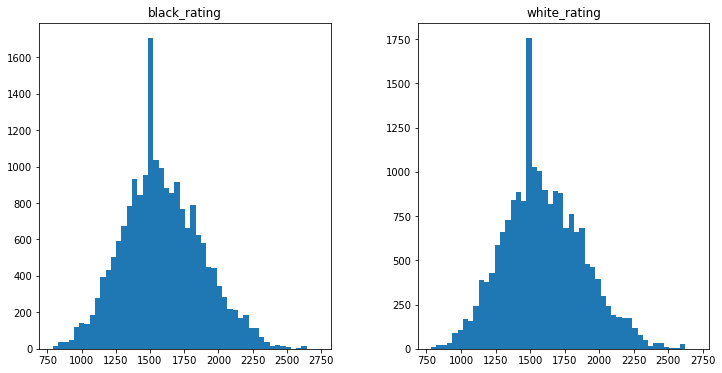

In [19]:
df[['black_rating', 'white_rating',]].hist(figsize=(12, 6), bins=50, grid=False)

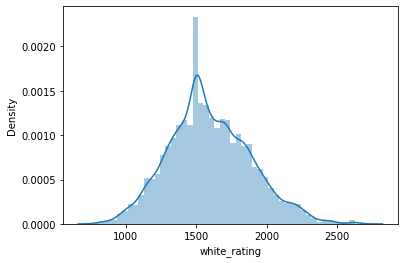

In [20]:
sns.distplot(df['white_rating'])

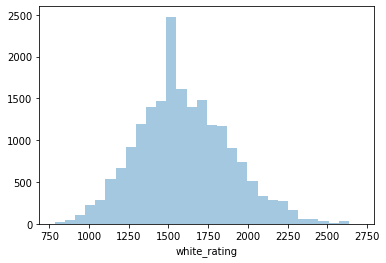

In [21]:
sns.distplot(df['white_rating'],kde=False,bins=30)

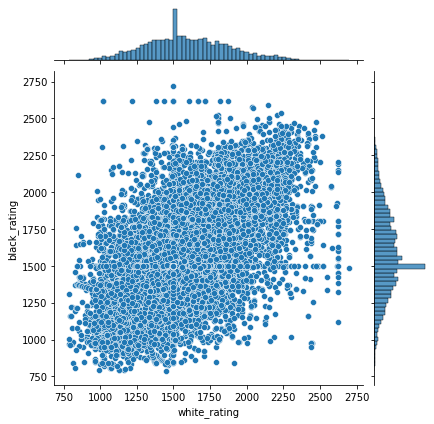

In [22]:
sns.jointplot(x='white_rating',y='black_rating',data=df,kind='scatter')

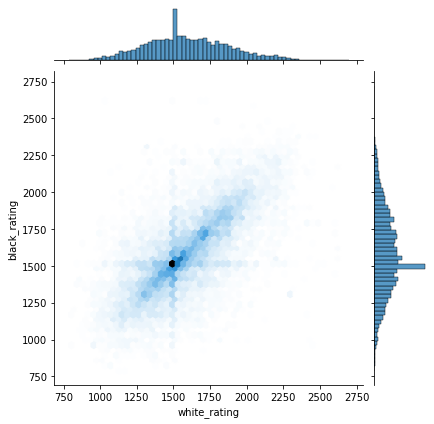

In [23]:
sns.jointplot(x='white_rating',y='black_rating',data=df,kind='hex')

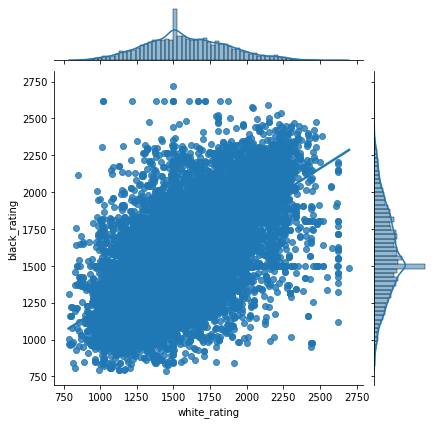

In [24]:
sns.jointplot(x='white_rating',y='black_rating',data=df,kind='reg')

# 3.Categorical Plots

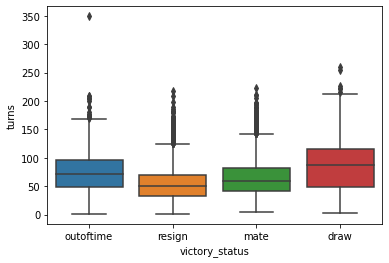

In [26]:
sns.boxplot(x='victory_status', y="turns", data=df2);

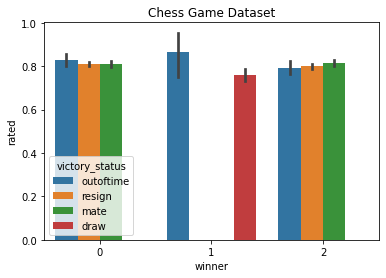

In [27]:
sns.barplot(x="winner", y="rated", hue="victory_status", data=df2).set_title("Chess Game Dataset");

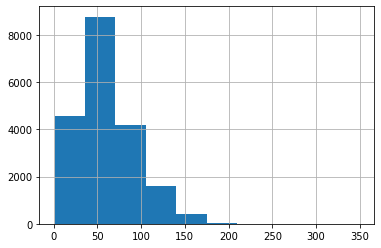

In [28]:
df['turns'].hist();

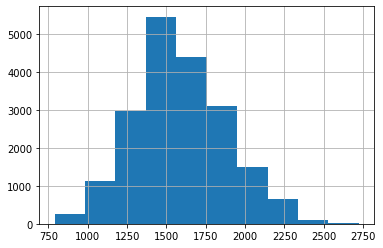

In [29]:
df['black_rating'].hist()

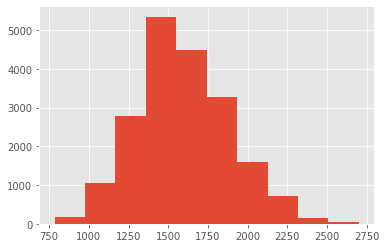

In [30]:
plt.style.use('ggplot')
df['white_rating'].hist()

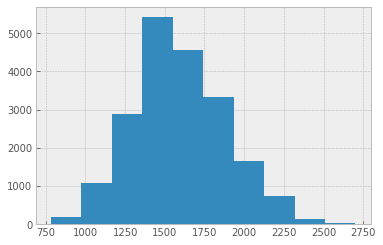

In [ ]:
plt.style.use('bmh')
df['white_rating'].hist()

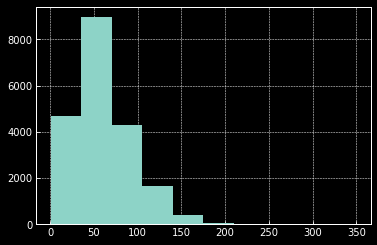

In [ ]:
plt.style.use('dark_background')
df['turns'].hist()